# RSI Analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import ta


In [6]:
ticker="MSFT"
start_date="2020-01-01"
end_date="2025-05-14"

# Download historical data
data = yf.download(ticker, start=start_date, end=end_date,multi_level_index=False)
data.reset_index(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

[*********************100%***********************]  1 of 1 completed


In [7]:
display(data.tail())

,Close,High,Low,Open,Volume
Date,,,,,
2025-05-07,433.350006,438.119995,431.109985,433.839996,23295300
2025-05-08,438.170013,443.670013,435.660004,437.929993,23491300
2025-05-09,438.730011,440.739990,435.880005,440.000000,15324200
2025-05-12,449.260010,449.369995,439.779999,445.940002,22821900
2025-05-13,449.140015,450.670013,445.359985,447.779999,23600600


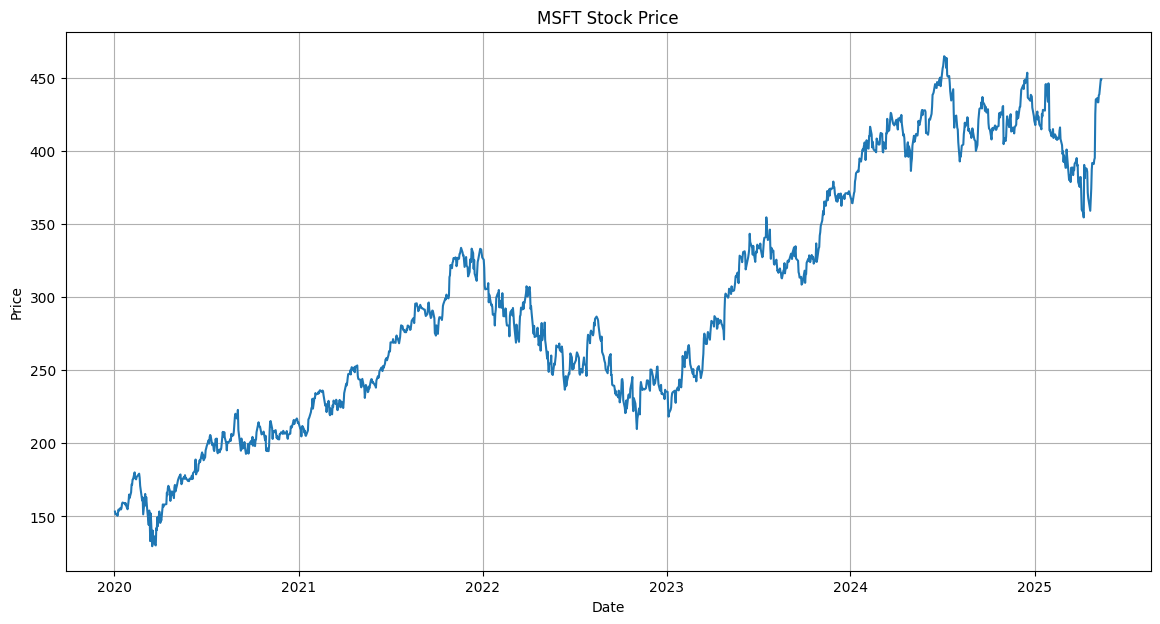

In [8]:
#plot the stock price
plt.figure(figsize=(14, 7))
plt.plot(data['Close'])
plt.title(f'{ticker} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

## Relative Strength Index (RSI):

- ความหมาย: RSI คือเครื่องมือวัดโมเมนตัม (Momentum Indicator) ที่ใช้ในการวิเคราะห์ทางเทคนิค เพื่อวัดความเร็วและความแรงของการเปลี่ยนแปลงราคาในช่วงเวลาที่กำหนด
- ลักษณะ: RSI เป็น Oscillator ที่มีค่าตั้งแต่ 0 ถึง 100
- สูตรการคำนวณ:
    1. คำนวณค่าเฉลี่ยของราคาที่ปรับตัวขึ้น (Average Gain): โดยปกติจะใช้ช่วงเวลา 14 วัน
    2. คำนวณค่าเฉลี่ยของราคาที่ปรับตัวลง (Average Loss): โดยปกติจะใช้ช่วงเวลา 14 วัน
    3. คำนวณ Relative Strength (RS): RS = Average Gain / Average Loss
    4. คำนวณ RSI: RSI = 100 - [100 / (1 + RS)]
- การตีความ:
    - Overbought (ซื้อมากเกินไป): เมื่อ RSI มีค่ามากกว่า 70 แสดงว่าราคาอาจสูงเกินไป และมีโอกาสที่จะปรับตัวลง
    - Oversold (ขายมากเกินไป): เมื่อ RSI มีค่าน้อยกว่า 30 แสดงว่าราคาอาจต่ำเกินไป และมีโอกาสที่จะปรับตัวขึ้น
    - Divergence (ความขัดแย้ง): เกิดขึ้นเมื่อราคาและ RSI เคลื่อนที่ในทิศทางตรงกันข้าม ซึ่งอาจเป็นสัญญาณของการกลับตัว
        - Bearish Divergence: ราคาทำจุดสูงสุดใหม่ แต่ RSI ไม่ทำจุดสูงสุดใหม่ (อาจเป็นสัญญาณว่าแนวโน้มขาขึ้นกำลังอ่อนตัวลง)
        - Bullish Divergence: ราคาทำจุดต่ำสุดใหม่ แต่ RSI ไม่ทำจุดต่ำสุดใหม่ (อาจเป็นสัญญาณว่าแนวโน้มขาลงกำลังอ่อนตัวลง)
    - Centerline Crossover (การตัดเส้นกึ่งกลาง): เมื่อ RSI ตัดขึ้นเหนือเส้น 50 อาจเป็นสัญญาณซื้อ และเมื่อ RSI ตัดลงต่ำกว่าเส้น 50 อาจเป็นสัญญาณขาย
- การใช้งาน:
    - ระบุ Overbought และ Oversold: ใช้เพื่อหาจังหวะในการซื้อขาย
    - ยืนยันแนวโน้ม: ใช้ร่วมกับเครื่องมืออื่น ๆ เพื่อยืนยันแนวโน้ม
    - หา Divergence: ใช้เพื่อหาโอกาสในการกลับตัว
- สิ่งที่ RSI บอกเรา:
    - ความเร็วและความแรงของการเปลี่ยนแปลงราคา
    - สภาวะ Overbought และ Oversold
    - โอกาสในการกลับตัว

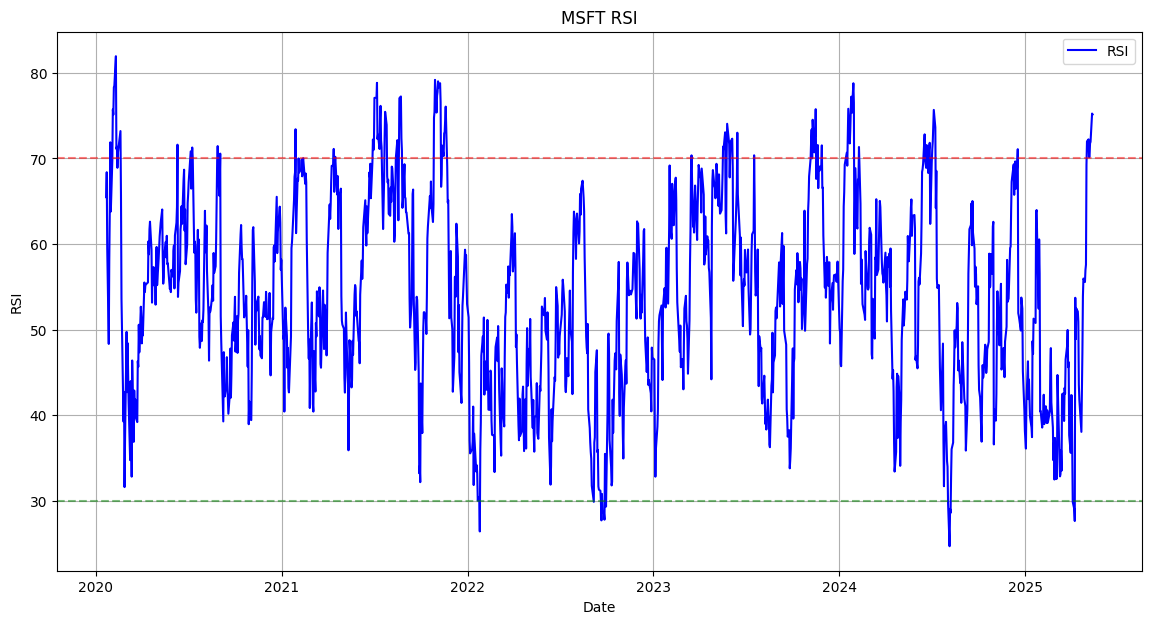

In [9]:
#RSI
data['RSI'] = ta.momentum.RSIIndicator(data['Close'], window=14).rsi()
#plot the RSI
plt.figure(figsize=(14, 7))
plt.plot(data['RSI'], label='RSI', color='blue')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.title(f'{ticker} RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid()
plt.show()